## Titanic Survival Prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


# new
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
    
import warnings
warnings.filterwarnings('ignore')

## Load the dataset using Seaborn

In [2]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## about the dataset

We'll be working with the Titanic passenger dataset to build a classification model to predict whether a passenger survied the sinking of the Titanic.  
Here is the data dictionary:

| Variable   |	Definition   |
 |:------|:--------------------------------|
 |survived | survived? 0 = No, 1 = yes  |
 |pclass | Ticket class (int)  |
 |sex	 |sex |
 |age	 | age in years  |
 |sibsp  |	# of siblings / spouses aboard the Titanic |
 |parch  |	# of parents / children aboard the Titanic |
 |fare   |	Passenger fare   |
 |embarked | Port of Embarkation |
 |class  |Ticket class (obj)   |
 |who    | man, woman, or child  |
 |adult_male | True/False |
 |alive  | yes/no  |
 |alone  | yes/no  |


In [3]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [4]:
titanic.shape

(891, 15)

In [5]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Age has null values. 

## Checking Missing Values

In [6]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

## Plotting and Visualizing Data

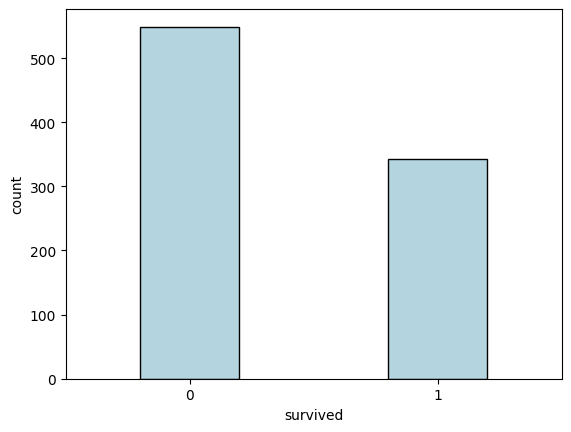

In [7]:
sns.countplot(data= titanic, x = titanic.survived, color = 'lightblue', width = 0.4, edgecolor = 'black')
plt.show()

In [8]:
titanic['survived'].value_counts().sort_values(ascending = False)

survived
0    549
1    342
Name: count, dtype: int64

From our dataset, we can clearly see that, people who didn't survive outnumbered the people who survived

In [9]:
titanic.pclass.value_counts()

pclass
3    491
1    216
2    184
Name: count, dtype: int64

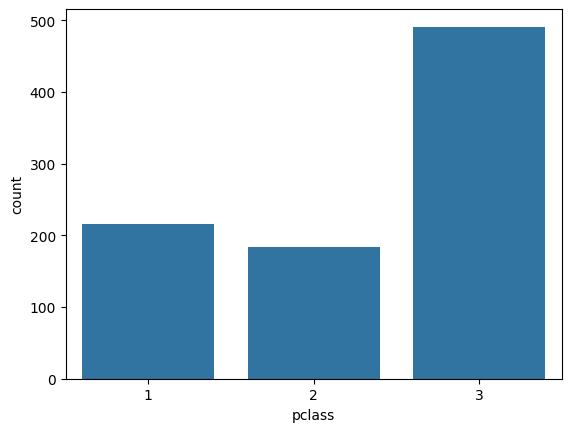

In [10]:
sns.countplot(data = titanic, x = titanic.pclass)
plt.show()

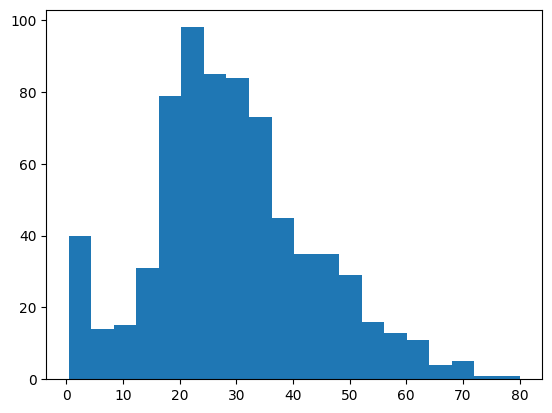

In [11]:
plt.hist(x = titanic.age, bins = 20, align = 'mid')
plt.show()

In [12]:
titanic.age.value_counts()

age
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: count, Length: 88, dtype: int64

In [13]:
titanic.age = titanic.age.fillna(titanic.age.mean())

In [14]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [15]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [16]:
features = ['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'class', 'who', 'adult_male', 'alone']
target= 'survived'

X = titanic[features]
y = titanic[target]

## Split the data into train and test dataset

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [22]:
y_train.shape, y_test.shape

((712,), (179,))

In [23]:
y_train.value_counts(), y_test.value_counts()

(survived
 0    439
 1    273
 Name: count, dtype: int64,
 survived
 0    110
 1     69
 Name: count, dtype: int64)

## Define preprocessing transformers for numerical and categorical features

In [27]:
categorical_features = X_train.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_features = X_train.select_dtypes(include = ['number']).columns.tolist()

In [30]:
print(f"Numerical_Features: {numerical_features}")
print(f"Categorical_Features: {categorical_features}")

Numerical_Features: ['pclass', 'age', 'sibsp', 'parch', 'fare']
Categorical_Features: ['sex', 'class', 'who']


### Define Separate Pipeline for both feature types

In [32]:
titanic[numerical_features].isnull().sum(),titanic[categorical_features].isnull().sum()

(pclass    0
 age       0
 sibsp     0
 parch     0
 fare      0
 dtype: int64,
 sex      0
 class    0
 who      0
 dtype: int64)

In [33]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer

numerical_transformer = Pipeline(steps = [
    ('imputer', SimpleImputer(strategy = 'median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps = [
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

## Combine the transform into a single column transformer

In [34]:
preprocessor = ColumnTransformer(
    transformers = [
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

## Create a Model Pipeline

In [35]:
pipeline = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state = 42,))
])


## Define a parameter grid

In [36]:
param_grid = {
    'classifier__n_estimators': [50,100],
    'classifier__max_depth':[None, 10, 20],
    'classifier__min_samples_split':[2,5]
}

## Perform grid search cross validation and fit the best model to the training data

In [37]:
## Cross validation method
cv = StratifiedKFold(n_splits = 5, shuffle = True)

## Train the pipeline model

In [38]:
model = GridSearchCV(estimator = pipeline, param_grid=param_grid, cv = cv, scoring = 'accuracy', verbose = 2)
model.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=50; total time=   0.3s
[CV] END classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=50; total time=   0.1s
[CV] END classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=50; total time=   0.1s
[CV] END classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=50; total time=   0.1s
[CV] END classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=50; total time=   0.1s
[CV] END classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   0.1s
[CV] END classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   0.1s
[CV] END classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=100; total time=

,estimator,Pipeline(step...m_state=42))])
,param_grid,"{'classifier__max_depth': [None, 10, ...], 'classifier__min_samples_split': [2, 5], 'classifier__n_estimators': [50, 100]}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,StratifiedKFo... shuffle=True)
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,transformers,"[('num', ...), ('cat', ...)]"


## Get the model prediction from the grid search estimator on the unseeen data

In [39]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.88      0.87       110
           1       0.80      0.75      0.78        69

    accuracy                           0.83       179
   macro avg       0.83      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



## Plot the Confusion matrix

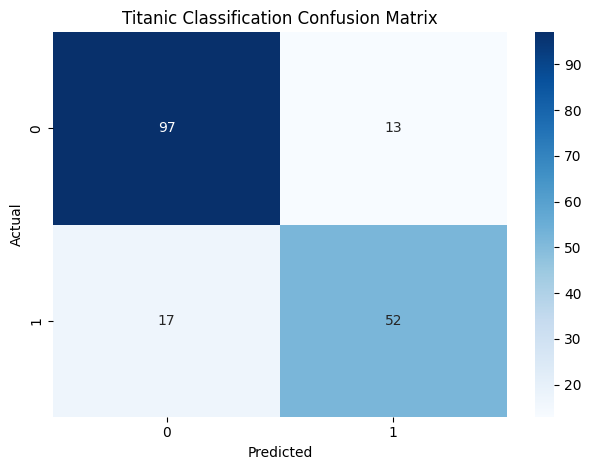

In [40]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure()
sns.heatmap(conf_matrix, annot = True, cmap = 'Blues', fmt = 'd')

# Set the title and labels
plt.title('Titanic Classification Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Show the plot
plt.tight_layout()
plt.show()

## Feature importance

In [43]:
model.best_estimator_['preprocessor'].named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_features)

array(['sex_female', 'sex_male', 'class_First', 'class_Second',
       'class_Third', 'who_child', 'who_man', 'who_woman'], dtype=object)

In [45]:
feature_importances = model.best_estimator_['classifier'].feature_importances_

In [46]:
feature_importances

array([0.04799037, 0.16653767, 0.04533716, 0.03216045, 0.20376273,
       0.10563074, 0.13617101, 0.02894582, 0.01281252, 0.04330787,
       0.01289622, 0.10982439, 0.05462304])

In [47]:
feature_names = numerical_features + list(model.best_estimator_['preprocessor']
                                         .named_transformers_['cat']
                                         .named_steps['onehot']
                                         .get_feature_names_out(categorical_features))

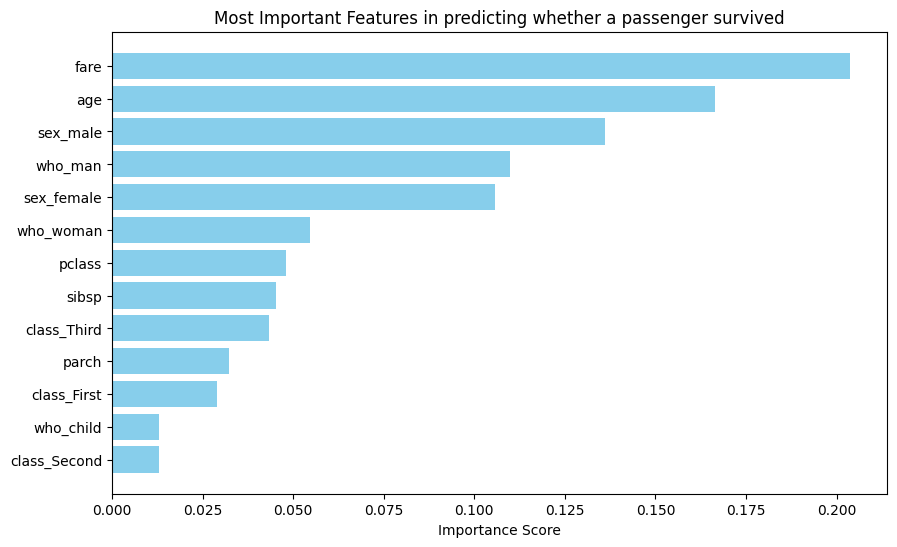


Test set accuracy: 83.24%


In [48]:
importance_df = pd.DataFrame({'Feature': feature_names,
                             'Importance': feature_importances}).sort_values(by = 'Importance', ascending = False)

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.gca().invert_yaxis() 
plt.title('Most Important Features in predicting whether a passenger survived')
plt.xlabel('Importance Score')
plt.show()

# Print test score 
test_score = model.score(X_test, y_test)
print(f"\nTest set accuracy: {test_score:.2%}")

## Try another Model

In [49]:
## new model
pipeline.set_params(classifier = LogisticRegression(random_state=42))

# update the model's estimator to use the new pipeline
model.estimator  = pipeline

# Define a grad_parameter with logistic Regression parameter
param_grid = {
    'classifier__solver':['liblinear'],
    'classifier__penalty': ['l1','l2'],
    'classifier__class_weight': [None, 'balanced']
}

model.param_grid = param_grid

model.fit(X_train, y_train)

# make prediction
y_pred = model.predict(X_test)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END classifier__class_weight=None, classifier__penalty=l1, classifier__solver=liblinear; total time=   0.3s
[CV] END classifier__class_weight=None, classifier__penalty=l1, classifier__solver=liblinear; total time=   0.0s
[CV] END classifier__class_weight=None, classifier__penalty=l1, classifier__solver=liblinear; total time=   0.0s
[CV] END classifier__class_weight=None, classifier__penalty=l1, classifier__solver=liblinear; total time=   0.0s
[CV] END classifier__class_weight=None, classifier__penalty=l1, classifier__solver=liblinear; total time=   0.0s
[CV] END classifier__class_weight=None, classifier__penalty=l2, classifier__solver=liblinear; total time=   0.0s
[CV] END classifier__class_weight=None, classifier__penalty=l2, classifier__solver=liblinear; total time=   0.0s
[CV] END classifier__class_weight=None, classifier__penalty=l2, classifier__solver=liblinear; total time=   0.0s
[CV] END classifier__class_weight=No

In [51]:
# Get the classification score from the model
score = classification_report(y_test, y_pred)
print(score)

              precision    recall  f1-score   support

           0       0.84      0.89      0.86       110
           1       0.81      0.72      0.76        69

    accuracy                           0.83       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.83      0.83      0.82       179



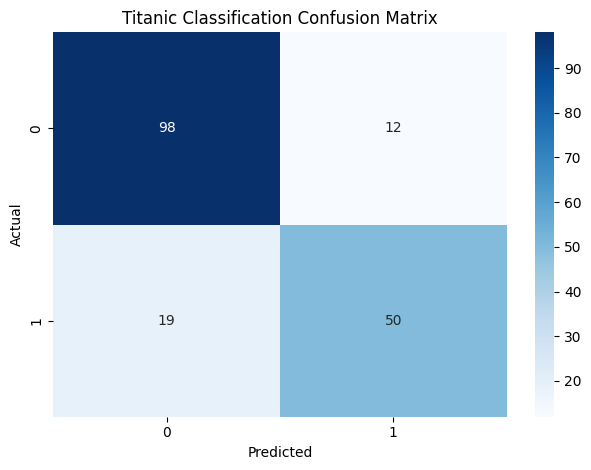

In [53]:
## Plot the confusion matrices

conf_matrices = confusion_matrix(y_test, y_pred)

sns.heatmap(conf_matrices, annot = True, cmap = 'Blues',fmt = 'd')


# Set the title and labels
plt.title('Titanic Classification Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Show the plot
plt.tight_layout()

plt.show()

## Extract the logistic regression feature coeff and plot in barchart

In [58]:
coefficients = model.best_estimator_.named_steps['classifier'].coef_[0]

## Combine numerical and categorical features
numerical_feature_names = numerical_features
categorical_feature_names = (model.best_estimator_.named_steps['preprocessor']
                             .named_transformers_['cat'].named_steps['onehot']
                             .get_feature_names_out(categorical_features))

feature_names = numerical_feature_names+list(categorical_feature_names)

In [59]:
feature_names

['pclass',
 'age',
 'sibsp',
 'parch',
 'fare',
 'sex_female',
 'sex_male',
 'class_First',
 'class_Second',
 'class_Third',
 'who_child',
 'who_man',
 'who_woman']

## Plot the feature coeff matrix

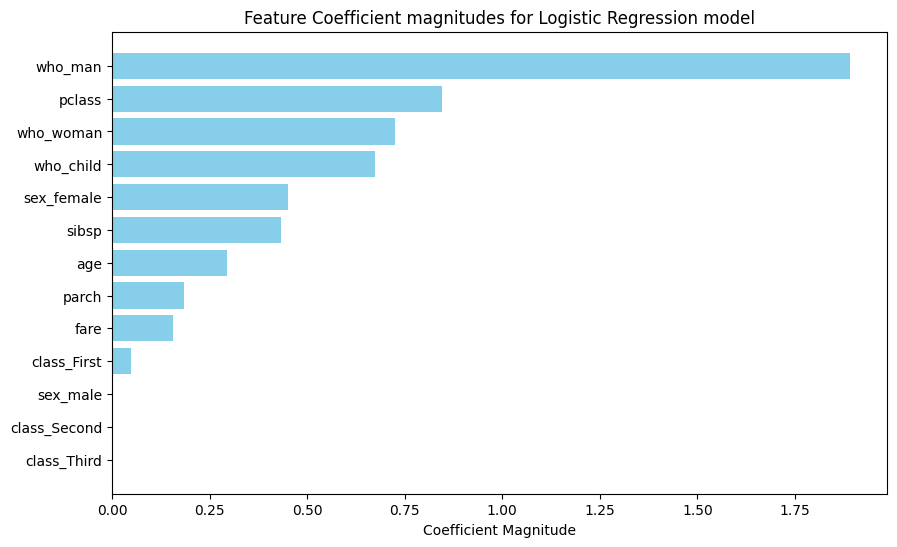


Test set accuracy: 82.68%


In [74]:
importance_df = pd.DataFrame({
    'feature_names':feature_names,
    'coefficients': coefficients
}).sort_values(by = 'coefficients', ascending = False, key = abs)

## Plotting
plt.figure(figsize = (10,6))
plt.barh(importance_df['feature_names'], importance_df['coefficients'].abs(), color = 'skyblue')
plt.gca().invert_yaxis()


plt.title('Feature Coefficient magnitudes for Logistic Regression model')
plt.xlabel('Coefficient Magnitude')
plt.show()

# Print test score
test_score = model.best_estimator_.score(X_test,y_test)
print(f"\nTest set accuracy: {test_score:.2%}")

In [61]:
importance_df

,feature_names,coefficients
0,pclass,-0.845755
1,age,-0.294216
2,sibsp,-0.433980
3,parch,-0.183292
4,fare,0.155225
5,sex_female,0.451581
6,sex_male,0.000000
7,class_First,0.047701
8,class_Second,0.000000
9,class_Third,0.000000


In [64]:
## To be sure how the feature is set up inside the mode
all_feature_setup = model.best_estimator_.named_steps['preprocessor'].get_feature_names_out()
all_feature_setup

array(['num__pclass', 'num__age', 'num__sibsp', 'num__parch', 'num__fare',
       'cat__sex_female', 'cat__sex_male', 'cat__class_First',
       'cat__class_Second', 'cat__class_Third', 'cat__who_child',
       'cat__who_man', 'cat__who_woman'], dtype=object)

## Practice

Perfect 👍 you’ve already got a very solid setup with `SimpleImputer` + `OneHotEncoder`. Let’s go step by step so you understand what other **options** are available and the **basics** of these preprocessing tools.

---

## 🔹 1. **SimpleImputer** (filling missing values)

`SimpleImputer(strategy=...)` handles missing values (`NaN`) in your dataset.

### Available strategies:

* **For numerical features:**

  * `"mean"` → replace missing values with the column mean.
  * `"median"` → replace missing values with the column median (robust to outliers).
  * `"most_frequent"` → replace with the most common value (mode).
  * `"constant"` → replace with a fixed value (`fill_value` parameter). Example:

    ```python
    SimpleImputer(strategy="constant", fill_value=0)
    ```

* **For categorical features:**

  * `"most_frequent"` → most common category (default).
  * `"constant"` → placeholder label, e.g. `"Unknown"`:

    ```python
    SimpleImputer(strategy="constant", fill_value="Unknown")
    ```

---

## 🔹 2. **OneHotEncoder** (encoding categories)

Turns categorical variables into binary indicator columns.

### Useful options:

* **`handle_unknown`**

  * `"ignore"` → if test data has a category not seen in training, encoder outputs all-zeros for that column (prevents error).
  * `"error"` (default) → raises an error if unseen category appears.

* **`drop`**

  * `None` (default) → keep all categories.
  * `"first"` → drop the first category of each feature (avoids multicollinearity in linear models).
  * A list/array → manually specify which category to drop.

* **`sparse_output`** (new in sklearn 1.2; earlier was `sparse`)

  * `True` → output a sparse matrix (saves memory for large categories).
  * `False` → output dense NumPy array.

* **`dtype`**

  * By default: `np.float64`.
  * You can set `dtype=int` if you want 0/1 integers.

Example:

```python
OneHotEncoder(handle_unknown="ignore", drop="first", sparse_output=False, dtype=int)
```

---

## 🔹 3. Other Encoders (besides OneHotEncoder)

Sometimes one-hot encoding creates too many columns (high cardinality categories). Alternatives:

* **OrdinalEncoder** → maps categories to integers (e.g., `"low"=0, "medium"=1, "high"=2`).
  Good for ordinal variables (where order matters), not for nominal.

* **TargetEncoder / MeanEncoder** (not in sklearn, but in libraries like `category_encoders`)
  Replace categories with mean of target (useful in regression/classification).

* **HashingEncoder** → hashes categories into a fixed number of columns (handles high-cardinality features).

---

## 🔹 4. Typical best practices

* **Numerical missing values:** `median` imputation is safest, especially with skewed data.
* **Categorical missing values:** use `"most_frequent"` or `"constant"="Unknown"`.
* **OneHotEncoder:** always set `handle_unknown="ignore"` in pipelines (prevents errors in production).
* **Avoid dummy variable trap:** use `drop="first"` when training linear models, but keep all categories for tree-based models.

---

✅ **Quick Example** combining these ideas:

```python
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='Missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', drop=None, sparse_output=False))
])
```

---